# Coding Exercises (Part 16)

## Financial Portfolios

### Exercise 16 : Modern Portfolio Theory and Asset Pricing 

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment 
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

If you need a hint, check the __Hints Section__ at the end of this Notebook. Exercises and Hints are numerated accordingly.

If you need some further help or if you want to check your code, you can also check the __solutions notebook__.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Option 1: Self_guided

Import the datasets __us_stocks.csv__ and __SP500_TR.csv__ and select the 5-Year period from __31-12-2013__ (incl.) until __31-12-2018__ (incl.). Save the DataFrames in the variables __stocks__ and __SP500__ and finally __add the S&P 500__ to the stocks DataFrame as the best approximation for the Market Portfolio (column __"MP"__)!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [39]:
stocks=pd.read_csv("us_stocks.csv",header=[0,1],index_col=0,parse_dates=True)["31-12-2013":"1-1-2019"]
stocks.head()

Open                                                         \
                  AXP         FB       INTC        MCD         PG        WMT   
Date                                                                           
2013-12-31  89.870003  54.119999  25.809999  96.949997  81.830002  78.660004   
2014-01-02  90.900002  54.830002  25.780001  96.809998  81.330002  78.720001   
2014-01-03  89.150002  55.020000  25.860001  96.900002  80.760002  78.809998   
2014-01-06  89.699997  54.419998  25.770000  96.620003  80.610001  78.860001   
2014-01-07  90.169998  57.700001  25.540001  96.379997  80.709999  78.169998   

                 High                                   ...  Adj Close  \
                  AXP         FB       INTC        MCD  ...       INTC   
Date                                                    ...              
2013-12-31  90.790001  54.860001  26.040001  97.080002  ...  22.291279   
2014-01-02  91.080002  55.220001  25.820000  97.029999  ...  22.145308   
2014-01-03  90.080002  55.650002  25.900000  97.029999  ...  22.136719   
2014-01-06  90.250000  57.259998  25.790001  96.620003  ...  21.861942   
2014-01-07  90.699997  58.549999  25.730000  97.080002  ...  21.973566   

                                              Volume                        \
                  MCD         PG        WMT      AXP          FB      INTC   
Date                                                                         
2013-12-31  82.911514  68.759727  69.113091  3083500  43076200.0  22808100   
2014-01-02  82.381737  68.024887  69.306335  5112000  43195500.0  31833300   
2014-01-03  82.492821  67.948891  69.077980  3888500  38246200.0  27796700   
2014-01-06  81.903206  68.109367  68.691544  2844700  68852600.0  28682300   
2014-01-07  82.356094  68.768166  68.902321  4039500  77207400.0  19665100   

                                       
                MCD       PG      WMT  
Date                                   
2013-12-31  2560900  5765300  3859100  
2014-01-02  2925800  6981700  6878000  
2014-01-03  2965300  6925600  4957400  
2014-01-06  5022700  7208200  7280200  
2014-01-07  4881800  7158200  5012300  

[5 rows x 36 columns]

In [40]:
SP500=pd.read_csv("SP500_TR.csv",index_col=0,parse_dates=True)["31-12-2013":"1-1-2019"]
SP500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-31,3305.28,3317.24,3305.03,3315.59,3315.59,0
2014-01-02,3311.58,3311.58,3279.14,3286.69,3286.69,0
2014-01-03,3288.99,3297.92,3281.69,3285.68,3285.68,0
2014-01-06,3287.43,3296.11,3272.34,3277.48,3277.48,0
2014-01-07,3281.00,3301.37,3281.00,3297.45,3297.45,0


In [41]:
header_1=[x[0] for x in stocks.columns]
header_1_u=list(set([x[0] for x in stocks.columns]))
header_1_u.sort(key=header_1.index)
header_1_u

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [42]:
for x in header_1_u:
    stocks[(x,"MP")]=SP500[x]

In [43]:
stocks

Open                                                \
                  AXP          FB       INTC         MCD         PG   
Date                                                                  
2013-12-31  89.870003   54.119999  25.809999   96.949997  81.830002   
2014-01-02  90.900002   54.830002  25.780001   96.809998  81.330002   
2014-01-03  89.150002   55.020000  25.860001   96.900002  80.760002   
2014-01-06  89.699997   54.419998  25.770000   96.620003  80.610001   
2014-01-07  90.169998   57.700001  25.540001   96.379997  80.709999   
...               ...         ...        ...         ...        ...   
2018-12-21  95.199997  133.389999  45.750000  173.529999  90.610001   
2018-12-24  90.739998  123.099998  44.630001  174.240005  90.449997   
2018-12-26  89.849998  126.000000  44.000000  170.089996  87.419998   
2018-12-27  92.360001  132.440002  45.619999  173.289993  89.610001   
2018-12-28  95.400002  135.339996  46.509998  176.300003  92.559998   

                            High                                     ...  \
                  WMT        AXP          FB       INTC         MCD  ...   
Date                                                                 ...   
2013-12-31  78.660004  90.790001   54.860001  26.040001   97.080002  ...   
2014-01-02  78.720001  91.080002   55.220001  25.820000   97.029999  ...   
2014-01-03  78.809998  90.080002   55.650002  25.900000   97.029999  ...   
2014-01-06  78.860001  90.250000   57.259998  25.790001   96.620003  ...   
2014-01-07  78.169998  90.699997   58.549999  25.730000   97.080002  ...   
...               ...        ...         ...        ...         ...  ...   
2018-12-21  86.870003  96.629997  134.899994  46.650002  177.649994  ...   
2018-12-24  86.540001  91.550003  129.740005  45.169998  175.270004  ...   
2018-12-26  86.419998  93.889999  134.240005  46.200001  174.039993  ...   
2018-12-27  89.750000  94.680000  134.990005  46.380001  175.710007  ...   
2018-12-28  92.070000  95.650002  135.919998  47.740002  177.500000  ...   

              Volume                                  Open     High      Low  \
                INTC      MCD        PG       WMT       MP       MP       MP   
Date                                                                           
2013-12-31  22808100  2560900   5765300   3859100  3305.28  3317.24  3305.03   
2014-01-02  31833300  2925800   6981700   6878000  3311.58  3311.58  3279.14   
2014-01-03  27796700  2965300   6925600   4957400  3288.99  3297.92  3281.69   
2014-01-06  28682300  5022700   7208200   7280200  3287.43  3296.11  3272.34   
2014-01-07  19665100  4881800   7158200   5012300  3281.00  3301.37  3281.00   
...              ...      ...       ...       ...      ...      ...      ...   
2018-12-21  52768300  8536900  24030000  14921500  4899.41  4976.56  4787.04   
2018-12-24  19241600  2400900   7396300   6110300  4770.95  4790.00  4672.66   
2018-12-26  28677600  4065500   8630900  10028300  4696.63  4904.61  4664.09   
2018-12-27  29970700  3934500  11360100   9881500  4854.87  4946.94  4766.39   
2018-12-28  24758700  2896800   9611800   9874000  4967.52  5010.16  4916.64   

              Close Adj Close Volume  
                 MP        MP     MP  
Date                                  
2013-12-31  3315.59   3315.59      0  
2014-01-02  3286.69   3286.69      0  
2014-01-03  3285.68   3285.68      0  
2014-01-06  3277.48   3277.48      0  
2014-01-07  3297.45   3297.45      0  
...             ...       ...    ...  
2018-12-21  4802.51   4802.51      0  
2018-12-24  4672.66   4672.66      0  
2018-12-26  4904.49   4904.49      0  
2018-12-27  4946.94   4946.94      0  
2018-12-28  4941.61   4941.61      0  

[1258 rows x 42 columns]

In [47]:
stocks=stocks[header_1_u].copy()
stocks

Open                                                \
                  AXP          FB       INTC         MCD         PG   
Date                                                                  
2013-12-31  89.870003   54.119999  25.809999   96.949997  81.830002   
2014-01-02  90.900002   54.830002  25.780001   96.809998  81.330002   
2014-01-03  89.150002   55.020000  25.860001   96.900002  80.760002   
2014-01-06  89.699997   54.419998  25.770000   96.620003  80.610001   
2014-01-07  90.169998   57.700001  25.540001   96.379997  80.709999   
...               ...         ...        ...         ...        ...   
2018-12-21  95.199997  133.389999  45.750000  173.529999  90.610001   
2018-12-24  90.739998  123.099998  44.630001  174.240005  90.449997   
2018-12-26  89.849998  126.000000  44.000000  170.089996  87.419998   
2018-12-27  92.360001  132.440002  45.619999  173.289993  89.610001   
2018-12-28  95.400002  135.339996  46.509998  176.300003  92.559998   

                                     High                         ...  \
                  WMT       MP        AXP          FB       INTC  ...   
Date                                                              ...   
2013-12-31  78.660004  3305.28  90.790001   54.860001  26.040001  ...   
2014-01-02  78.720001  3311.58  91.080002   55.220001  25.820000  ...   
2014-01-03  78.809998  3288.99  90.080002   55.650002  25.900000  ...   
2014-01-06  78.860001  3287.43  90.250000   57.259998  25.790001  ...   
2014-01-07  78.169998  3281.00  90.699997   58.549999  25.730000  ...   
...               ...      ...        ...         ...        ...  ...   
2018-12-21  86.870003  4899.41  96.629997  134.899994  46.650002  ...   
2018-12-24  86.540001  4770.95  91.550003  129.740005  45.169998  ...   
2018-12-26  86.419998  4696.63  93.889999  134.240005  46.200001  ...   
2018-12-27  89.750000  4854.87  94.680000  134.990005  46.380001  ...   
2018-12-28  92.070000  4967.52  95.650002  135.919998  47.740002  ...   

            Adj Close                        Volume                        \
                   PG        WMT       MP       AXP          FB      INTC   
Date                                                                        
2013-12-31  68.759727  69.113091  3315.59   3083500  43076200.0  22808100   
2014-01-02  68.024887  69.306335  3286.69   5112000  43195500.0  31833300   
2014-01-03  67.948891  69.077980  3285.68   3888500  38246200.0  27796700   
2014-01-06  68.109367  68.691544  3277.48   2844700  68852600.0  28682300   
2014-01-07  68.768166  68.902321  3297.45   4039500  77207400.0  19665100   
...               ...        ...      ...       ...         ...       ...   
2018-12-21  90.256142  87.129997  4802.51  11005300  56901500.0  52768300   
2018-12-24  86.674469  85.820000  4672.66   3190900  22066000.0  19241600   
2018-12-26  89.383041  90.410004  4904.49   5383700  39723400.0  28677600   
2018-12-27  91.297897  91.589996  4946.94   4226600  31202500.0  29970700   
2018-12-28  90.464493  92.129997  4941.61   3225100  22627600.0  24758700   

                                            
                MCD        PG       WMT MP  
Date                                        
2013-12-31  2560900   5765300   3859100  0  
2014-01-02  2925800   6981700   6878000  0  
2014-01-03  2965300   6925600   4957400  0  
2014-01-06  5022700   7208200   7280200  0  
2014-01-07  4881800   7158200   5012300  0  
...             ...       ...       ... ..  
2018-12-21  8536900  24030000  14921500  0  
2018-12-24  2400900   7396300   6110300  0  
2018-12-26  4065500   8630900  10028300  0  
2018-12-27  3934500  11360100   9881500  0  
2018-12-28  2896800   9611800   9874000  0  

[1258 rows x 42 columns]

In [13]:
stocks.columns[]

MultiIndex([(     'Open',  'AXP'),
            (     'Open',   'FB'),
            (     'Open', 'INTC'),
            (     'Open',  'MCD'),
            (     'Open',   'PG'),
            (     'Open',  'WMT'),
            (     'High',  'AXP'),
            (     'High',   'FB'),
            (     'High', 'INTC'),
            (     'High',  'MCD'),
            (     'High',   'PG'),
            (     'High',  'WMT'),
            (      'Low',  'AXP'),
            (      'Low',   'FB'),
            (      'Low', 'INTC'),
            (      'Low',  'MCD'),
            (      'Low',   'PG'),
            (      'Low',  'WMT'),
            (    'Close',  'AXP'),
            (    'Close',   'FB'),
            (    'Close', 'INTC'),
            (    'Close',  'MCD'),
            (    'Close',   'PG'),
            (    'Close',  'WMT'),
            ('Adj Close',  'AXP'),
            ('Adj Close',   'FB'),
            ('Adj Close', 'INTC'),
            ('Adj Close',  'MCD'),
            ('Adj Cl

__Calculate__ (simple) __daily returns__ for the six stocks and the Market Portfolio and calculate the __annualized Risk and Return__! (Use the user-defined function ann_risk_return)

In [48]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

In [49]:
stocks.head()

Open                                                         \
                  AXP         FB       INTC        MCD         PG        WMT   
Date                                                                           
2013-12-31  89.870003  54.119999  25.809999  96.949997  81.830002  78.660004   
2014-01-02  90.900002  54.830002  25.780001  96.809998  81.330002  78.720001   
2014-01-03  89.150002  55.020000  25.860001  96.900002  80.760002  78.809998   
2014-01-06  89.699997  54.419998  25.770000  96.620003  80.610001  78.860001   
2014-01-07  90.169998  57.700001  25.540001  96.379997  80.709999  78.169998   

                          High                        ...  Adj Close  \
                 MP        AXP         FB       INTC  ...         PG   
Date                                                  ...              
2013-12-31  3305.28  90.790001  54.860001  26.040001  ...  68.759727   
2014-01-02  3311.58  91.080002  55.220001  25.820000  ...  68.024887   
2014-01-03  3288.99  90.080002  55.650002  25.900000  ...  67.948891   
2014-01-06  3287.43  90.250000  57.259998  25.790001  ...  68.109367   
2014-01-07  3281.00  90.699997  58.549999  25.730000  ...  68.768166   

                                 Volume                                 \
                  WMT       MP      AXP          FB      INTC      MCD   
Date                                                                     
2013-12-31  69.113091  3315.59  3083500  43076200.0  22808100  2560900   
2014-01-02  69.306335  3286.69  5112000  43195500.0  31833300  2925800   
2014-01-03  69.077980  3285.68  3888500  38246200.0  27796700  2965300   
2014-01-06  68.691544  3277.48  2844700  68852600.0  28682300  5022700   
2014-01-07  68.902321  3297.45  4039500  77207400.0  19665100  4881800   

                                 
                 PG      WMT MP  
Date                             
2013-12-31  5765300  3859100  0  
2014-01-02  6981700  6878000  0  
2014-01-03  6925600  4957400  0  
2014-01-06  7208200  7280200  0  
2014-01-07  7158200  5012300  0  

[5 rows x 42 columns]

In [51]:
adj_close_stocks=stocks.loc[:,"Adj Close"]
adj_close_stocks.head()

,AXP,FB,INTC,MCD,PG,WMT,MP
Date,,,,,,,
2013-12-31,83.891060,54.650002,22.291279,82.911514,68.759727,69.113091,3315.59
2014-01-02,82.707558,54.709999,22.145308,82.381737,68.024887,69.306335,3286.69
2014-01-03,82.975700,54.560001,22.136719,82.492821,67.948891,69.077980,3285.68
2014-01-06,82.938721,57.200001,21.861942,81.903206,68.109367,68.691544,3277.48
2014-01-07,82.624329,57.919998,21.973566,82.356094,68.768166,68.902321,3297.45


In [53]:
stocks_rt=adj_close_stocks.pct_change().dropna()
stocks_rt.head()

,AXP,FB,INTC,MCD,PG,WMT,MP
Date,,,,,,,
2014-01-02,-0.014108,0.001098,-0.006548,-0.006390,-0.010687,0.002796,-0.008716
2014-01-03,0.003242,-0.002742,-0.000388,0.001348,-0.001117,-0.003295,-0.000307
2014-01-06,-0.000446,0.048387,-0.012413,-0.007147,0.002362,-0.005594,-0.002496
2014-01-07,-0.003791,0.012587,0.005106,0.005530,0.009673,0.003068,0.006093
2014-01-08,0.003142,0.005352,-0.006252,-0.010064,-0.014493,-0.007903,0.000088


In [55]:
summary=ann_risk_return(stocks_rt)
summary

,Return,Risk
AXP,0.044418,0.207027
FB,0.223580,0.299131
INTC,0.177555,0.246522
MCD,0.163971,0.164948
PG,0.065845,0.147473
WMT,0.076464,0.194218
MP,0.088776,0.132281


Assume that the approx. __risk-free Return__ is __1.7%__ p.a.

__Calculate__ the following __Metrics__ for the six stocks and the Market Portfolio: 

- Sharpe Ratio
- Total Risk in Variance Units
- the annualized Covariance Matrix
- Systematic Risk
- Unsystematic Risk
- beta
- Required Return as per CAPM Model (capm_ret)
- alpha

In [57]:
rf=0.017

In [59]:
def get_sharpeRatio(summary):
    return (summary.loc[:,"Return"]-rf)/summary.loc[:,"Risk"]

In [67]:
summary["SharpeRatio"]=get_sharpeRatio(summary)

In [68]:
summary.head()

,Return,Risk,SharpeRatio
AXP,0.044418,0.207027,0.132435
FB,0.223580,0.299131,0.690599
INTC,0.177555,0.246522,0.651281
MCD,0.163971,0.164948,0.891011
PG,0.065845,0.147473,0.331215


In [69]:
def get_totalRisk(summary):
    return (summary.loc[:,"Risk"])**2

In [70]:
summary["TotalRisk"]=get_totalRisk(summary)
summary.head()

,Return,Risk,SharpeRatio,TotalRisk
AXP,0.044418,0.207027,0.132435,0.042860
FB,0.223580,0.299131,0.690599,0.089479
INTC,0.177555,0.246522,0.651281,0.060773
MCD,0.163971,0.164948,0.891011,0.027208
PG,0.065845,0.147473,0.331215,0.021748


In [65]:
daily_cov_matrix=stocks_rt.cov()
daily_cov_matrix

,AXP,FB,INTC,MCD,PG,WMT,MP
AXP,0.000170,0.000076,0.000072,0.000036,0.000035,0.000040,0.000068
FB,0.000076,0.000355,0.000106,0.000053,0.000032,0.000035,0.000087
INTC,0.000072,0.000106,0.000241,0.000044,0.000043,0.000046,0.000083
MCD,0.000036,0.000053,0.000044,0.000108,0.000036,0.000038,0.000043
PG,0.000035,0.000032,0.000043,0.000036,0.000086,0.000042,0.000038
WMT,0.000040,0.000035,0.000046,0.000038,0.000042,0.000150,0.000044
MP,0.000068,0.000087,0.000083,0.000043,0.000038,0.000044,0.000069


In [66]:
annual_cov_matrix=daily_cov_matrix*252
annual_cov_matrix

,AXP,FB,INTC,MCD,PG,WMT,MP
AXP,0.042860,0.019276,0.018060,0.009017,0.008723,0.010042,0.017259
FB,0.019276,0.089479,0.026799,0.013465,0.008101,0.008786,0.021977
INTC,0.018060,0.026799,0.060773,0.011087,0.010940,0.011704,0.020965
MCD,0.009017,0.013465,0.011087,0.027208,0.009086,0.009594,0.010888
PG,0.008723,0.008101,0.010940,0.009086,0.021748,0.010589,0.009632
WMT,0.010042,0.008786,0.011704,0.009594,0.010589,0.037721,0.011061
MP,0.017259,0.021977,0.020965,0.010888,0.009632,0.011061,0.017498


In [72]:
summary

,Return,Risk,SharpeRatio,TotalRisk
AXP,0.044418,0.207027,0.132435,0.042860
FB,0.223580,0.299131,0.690599,0.089479
INTC,0.177555,0.246522,0.651281,0.060773
MCD,0.163971,0.164948,0.891011,0.027208
PG,0.065845,0.147473,0.331215,0.021748
WMT,0.076464,0.194218,0.306171,0.037721
MP,0.088776,0.132281,0.542600,0.017498


In [74]:
summary["SystematicRisk"]=annual_cov_matrix["MP"]
summary.head()

,Return,Risk,SharpeRatio,TotalRisk,SystematicRisk
AXP,0.044418,0.207027,0.132435,0.042860,0.017259
FB,0.223580,0.299131,0.690599,0.089479,0.021977
INTC,0.177555,0.246522,0.651281,0.060773,0.020965
MCD,0.163971,0.164948,0.891011,0.027208,0.010888
PG,0.065845,0.147473,0.331215,0.021748,0.009632


In [76]:
summary["UnsystematicRisk"]=summary["TotalRisk"]-summary["SystematicRisk"]
summary

,Return,Risk,SharpeRatio,TotalRisk,SystematicRisk,UnsystematicRisk
AXP,0.044418,0.207027,0.132435,0.042860,0.017259,2.560124e-02
FB,0.223580,0.299131,0.690599,0.089479,0.021977,6.750259e-02
INTC,0.177555,0.246522,0.651281,0.060773,0.020965,3.980785e-02
MCD,0.163971,0.164948,0.891011,0.027208,0.010888,1.632039e-02
PG,0.065845,0.147473,0.331215,0.021748,0.009632,1.211585e-02
WMT,0.076464,0.194218,0.306171,0.037721,0.011061,2.666018e-02
MP,0.088776,0.132281,0.542600,0.017498,0.017498,1.387779e-17


In [78]:
summary["beta"]=summary["SystematicRisk"]/summary.loc["MP","TotalRisk"]
summary

,Return,Risk,SharpeRatio,TotalRisk,SystematicRisk,UnsystematicRisk,beta
AXP,0.044418,0.207027,0.132435,0.042860,0.017259,2.560124e-02,0.986318
FB,0.223580,0.299131,0.690599,0.089479,0.021977,6.750259e-02,1.255933
INTC,0.177555,0.246522,0.651281,0.060773,0.020965,3.980785e-02,1.198137
MCD,0.163971,0.164948,0.891011,0.027208,0.010888,1.632039e-02,0.622203
PG,0.065845,0.147473,0.331215,0.021748,0.009632,1.211585e-02,0.550467
WMT,0.076464,0.194218,0.306171,0.037721,0.011061,2.666018e-02,0.632092
MP,0.088776,0.132281,0.542600,0.017498,0.017498,1.387779e-17,1.000000


In [79]:
summary["CAPM PRICE"]=rf+summary["beta"]*(summary.loc["MP","Return"]-rf)
summary.head()

,Return,Risk,SharpeRatio,TotalRisk,SystematicRisk,UnsystematicRisk,beta,CAPM PRICE
AXP,0.044418,0.207027,0.132435,0.042860,0.017259,0.025601,0.986318,0.087794
FB,0.223580,0.299131,0.690599,0.089479,0.021977,0.067503,1.255933,0.107146
INTC,0.177555,0.246522,0.651281,0.060773,0.020965,0.039808,1.198137,0.102997
MCD,0.163971,0.164948,0.891011,0.027208,0.010888,0.016320,0.622203,0.061659
PG,0.065845,0.147473,0.331215,0.021748,0.009632,0.012116,0.550467,0.056510


In [81]:
summary["alpha"]=summary["Return"]-summary["CAPM PRICE"]
summary.head()

,Return,Risk,SharpeRatio,TotalRisk,SystematicRisk,UnsystematicRisk,beta,CAPM PRICE,alpha
AXP,0.044418,0.207027,0.132435,0.042860,0.017259,0.025601,0.986318,0.087794,-0.043376
FB,0.223580,0.299131,0.690599,0.089479,0.021977,0.067503,1.255933,0.107146,0.116434
INTC,0.177555,0.246522,0.651281,0.060773,0.020965,0.039808,1.198137,0.102997,0.074558
MCD,0.163971,0.164948,0.891011,0.027208,0.010888,0.016320,0.622203,0.061659,0.102311
PG,0.065845,0.147473,0.331215,0.021748,0.009632,0.012116,0.550467,0.056510,0.009335


Visualize __Systematic Risk__ and __Unsystematic Risk__ for all stocks and the MP in a __Barchart__. Which __Company__ most likely showed the __highest portion__ of __Company-specific Risk__ that can be diversified away in the Market Portfolio?

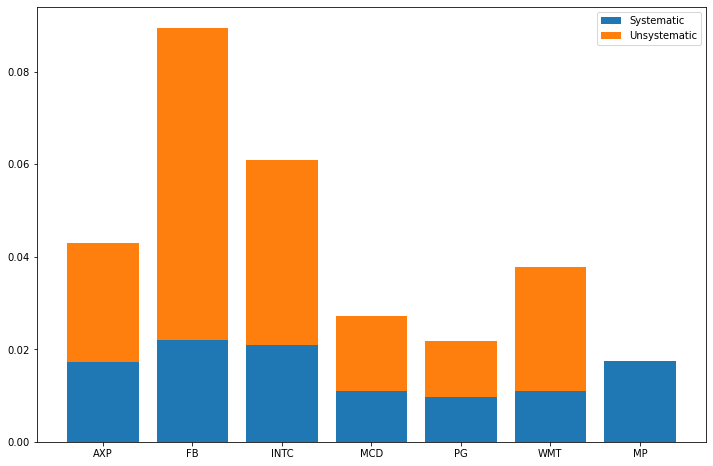

In [85]:
plt.figure(figsize=(12,8))
plt.bar(summary.index,summary.SystematicRisk,label="Systematic")
plt.bar(summary.index,summary.UnsystematicRisk,bottom=summary.SystematicRisk,label="Unsystematic")
plt.legend()
plt.show()

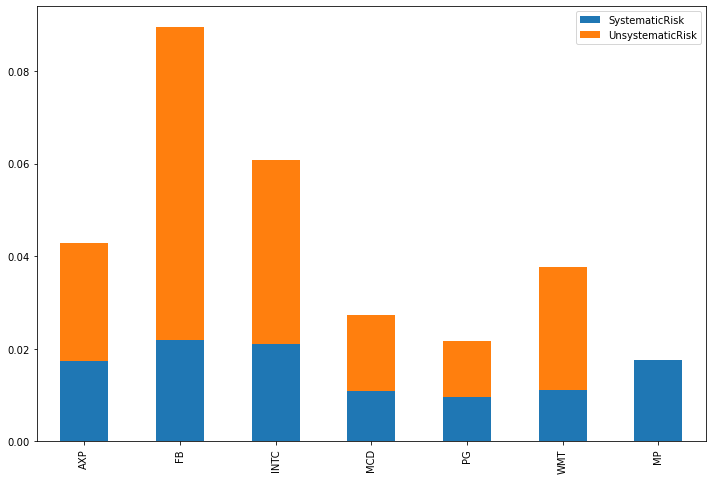

In [87]:
summary[["SystematicRisk","UnsystematicRisk"]].plot(kind="bar",stacked=True,figsize=(12,8),)
plt.show()

__Visualize__ the __Security Market Line__. __Determine__ the stocks that __overperformed__ and __underperformed__ the __Market__ in the Systematic Risk/Return Framework (CAPM).

In [88]:
summary.head()

,Return,Risk,SharpeRatio,TotalRisk,SystematicRisk,UnsystematicRisk,beta,CAPM PRICE,alpha
AXP,0.044418,0.207027,0.132435,0.042860,0.017259,0.025601,0.986318,0.087794,-0.043376
FB,0.223580,0.299131,0.690599,0.089479,0.021977,0.067503,1.255933,0.107146,0.116434
INTC,0.177555,0.246522,0.651281,0.060773,0.020965,0.039808,1.198137,0.102997,0.074558
MCD,0.163971,0.164948,0.891011,0.027208,0.010888,0.016320,0.622203,0.061659,0.102311
PG,0.065845,0.147473,0.331215,0.021748,0.009632,0.012116,0.550467,0.056510,0.009335


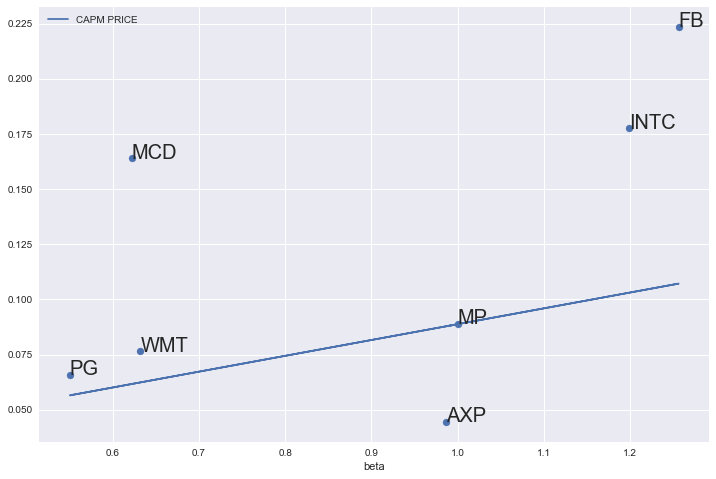

In [116]:
plt.style.use("seaborn")
summary.plot(x="beta", y="CAPM PRICE", figsize=(12, 8))
plt.scatter(x="beta", y="Return", data=summary)
for x in summary.index:
    plt.annotate(x, xy=(summary.loc[x, "beta"], summary.loc[x, "Return"]), xytext=(summary.loc[x, "beta"], summary.loc[x, "Return"]),fontsize=20)
plt.show()

------------------------

Highest alpha: Facebook; lowest alpha: American Express

# Well Done!

-------------------

# Hints (Spoiler!)

166. new column with label "MP"


`df[[col1,col2,col3]]` to customize the sequence of columns

to removew duplicate elements from the list while __remaining the sequence__:
    
```
list(set(target_list)).sort(key=target_list.index)
```

171. cov() method

172. the very last column in COV shows the covariance of the stocks with the MP (=Systematic Risk)

173. Unsystematic Risk = Total Risk - Systematic Risk

174. plot() method, "bar" plot

to create a stacked bar plot: `df.plot(kind="bar",stacked=True)`

175. beta = systematic risk / variance of the Market Portfolio

177. capm_return = risk-free Return + (Market Portfolio Return - risk-free Return) * beta 

178. alpha = actual/realized Return - capm_return